In [2]:
import numpy as np
# [\frac{2\ln 1/\beta}{\alpha}+2d_{0}+\frac{2d_{0}\ln2/\alpha}{\alpha}]
# d_0=(80\times80+40\times40+20\times20)\times3\times85
alpha = 0.02
beta = 0.02
d_0 = (80 * 80 + 40 * 40 + 20 * 20) * 3 
term = (2 * np.log(1 / beta) / alpha) + 2 * d_0 + (2 * d_0 * np.log(2 / alpha) / alpha)
print(term)

11655820.070990534


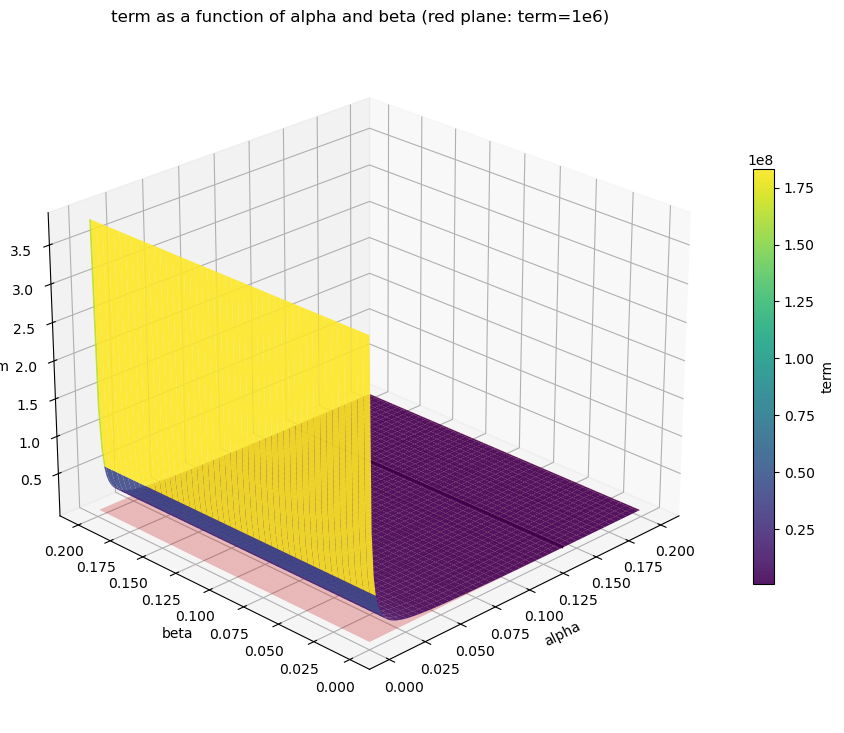

最接近 1000000.0 的 8 组 (alpha, beta, term, 差值):
alpha=0.141302, beta=0.001000, term=995706.941374, diff=4293.058626
alpha=0.141302, beta=0.002432, term=995694.364468, diff=4305.635532
alpha=0.141302, beta=0.003863, term=995687.811813, diff=4312.188187
alpha=0.141302, beta=0.005295, term=995683.349998, diff=4316.650002
alpha=0.141302, beta=0.006727, term=995679.962698, diff=4320.037302
alpha=0.141302, beta=0.008158, term=995677.231530, diff=4322.768470
alpha=0.141302, beta=0.009590, term=995674.943089, diff=4325.056911
alpha=0.141302, beta=0.011022, term=995672.973663, diff=4327.026337

全局最接近的一组：
alpha=0.141302, beta=0.001000, term=995706.941374, diff=4293.058626
在前 2000 个最接近 target 的组合中，按 |alpha-beta| 排序，输出前 5：
1: alpha=0.144165468, beta=0.144165468, term=969849.636667, |alpha-beta|=0.000000000, term_diff=30150.363333
2: alpha=0.141302158, beta=0.141302158, term=995636.866003, |alpha-beta|=0.000000000, term_diff=4363.133997
3: alpha=0.148460432, beta=0.148460432, term=933283.381951, |alph

In [16]:
import matplotlib.pyplot as plt

# grid for alpha and beta
alpha_vals = np.linspace(0.001, 0.2, 140)  # avoid zero
beta_vals = np.linspace(0.001, 0.2, 140)
A, B = np.meshgrid(alpha_vals, beta_vals)

# compute term on the grid (keep original d_0)
term_grid = (2 * np.log(1 / B) / A) + 2 * d_0 + (2 * d_0 * np.log(2 / A) / A)

# plot surface and plane term = 1e6
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(A, B, term_grid, cmap='viridis', linewidth=0, antialiased=True, alpha=0.9)

# plane at term = 1e6
plane_z = np.full_like(A, 1e6)
ax.plot_surface(A, B, plane_z, color='red', alpha=0.25)

# contour where term == 1e6 projected onto the plane
ax.contour(A, B, term_grid, levels=[1e6], zdir='z', offset=1e6, colors='k', linewidths=2)

ax.set_xlabel('alpha')
ax.set_ylabel('beta')
ax.set_zlabel('term')
ax.set_title('term as a function of alpha and beta (red plane: term=1e6)')
fig.colorbar(surf, shrink=0.6, label='term')
ax.view_init(elev=25, azim=-135)
plt.show()

# 找出使 term_grid 接近 1e6 的若干 (alpha, beta) 组合
target = 1e6
diff = np.abs(term_grid - target)

k = 8  # 想要的组合数量
idx_flat = np.argsort(diff.ravel())[:k]
rows, cols = np.unravel_index(idx_flat, diff.shape)

print(f"最接近 {target} 的 {k} 组 (alpha, beta, term, 差值):")
for r, c in zip(rows, cols):
    a = A[r, c]
    b = B[r, c]
    t = term_grid[r, c]
    d = abs(t - target)
    print(f"alpha={a:.6f}, beta={b:.6f}, term={t:.6f}, diff={d:.6f}")

# 同时输出全局最接近的一组
min_idx = np.argmin(diff)
r_min, c_min = np.unravel_index(min_idx, diff.shape)
print("\n全局最接近的一组：")
print(f"alpha={A[r_min,c_min]:.6f}, beta={B[r_min,c_min]:.6f}, term={term_grid[r_min,c_min]:.6f}, diff={diff[r_min,c_min]:.6f}")
# 在距离 target 最近的若干候选中，选择 alpha 和 beta 最接近的组合
top_n = min(2000, diff.size)  # 在前 top_n 个最接近 target 的组合中搜索
idxs = np.argsort(diff.ravel())[:top_n]
rows_n, cols_n = np.unravel_index(idxs, diff.shape)

ab_diff = np.abs(A[rows_n, cols_n] - B[rows_n, cols_n])
order = np.argsort(ab_diff)

top_m = 5  # 输出前几个 alpha≈beta 最接近的组合
print(f"在前 {top_n} 个最接近 target 的组合中，按 |alpha-beta| 排序，输出前 {top_m}：")
for i in range(min(top_m, len(order))):
    idx = order[i]
    r = rows_n[idx]; c = cols_n[idx]
    a_val = A[r, c]; b_val = B[r, c]
    t_val = term_grid[r, c]; diff_val = diff[r, c]
    print(f"{i+1}: alpha={a_val:.9f}, beta={b_val:.9f}, term={t_val:.6f}, |alpha-beta|={abs(a_val-b_val):.9f}, term_diff={diff_val:.6f}")

# 最优组合（在这批候选中 alpha 与 beta 最接近）
best_idx = order[0]
r_best = rows_n[best_idx]; c_best = cols_n[best_idx]
a_best = A[r_best, c_best]; b_best = B[r_best, c_best]
t_best = term_grid[r_best, c_best]; diff_best = diff[r_best, c_best]
print("\n最优组合（在候选集合内 alpha 与 beta 最接近）：")
print(f"alpha={a_best:.9f}, beta={b_best:.9f}, term={t_best:.6f}, |alpha-beta|={abs(a_best-b_best):.9f}, term_diff={diff_best:.6f}")

In [20]:
# Python
import numpy as np

beta = 0.02
d0 = (80*80 + 40*40 + 20*20) * 3 
def term(alpha):
    return (2 * np.log(1/beta) / alpha) + 2 * d0 + (2 * d0 * np.log(2/alpha) / alpha)

# bisection to solve term(alpha) = 1e6
lo, hi = 1e-4, 1.0
for _ in range(100):
    mid = 0.5*(lo+hi)
    if term(mid) > 1e6:
        lo = mid
    else:
        hi = mid
alpha_root = 0.5*(lo+hi)
print("alpha ≈", alpha_root)
print("term(alpha) =", term(alpha_root))

alpha ≈ 0.1408333990357265
term(alpha) = 1000000.0000000003


In [21]:
# Python
import numpy as np

alpha = 0.02
d0 = (80*80 + 40*40 + 20*20) * 3
def term(alpha, beta):
    return (2 * np.log(1/beta) / alpha) + 2 * d0 + (2 * d0 * np.log(2/alpha) / alpha)

beta_test = 1.0
print("d0 =", d0)
print("term(alpha=0.02, beta=1) =", term(alpha, beta_test))  # 最小可能值

d0 = 25200
term(alpha=0.02, beta=1) = 11655428.868689992


In [14]:
# N\ge \frac{2}{\beta} \times \log(\frac{1}{\alpha}+d_L)
print("d_0:", d_0)
N = (2 / beta) * (np.log(1 / alpha) + d_0)
print(f"N下界: {N}")

d_0: 1228800
N下界: 122880391.20230055
